In [1]:
!git clone https://github.com/am5113/ASPMI_DeepLearning.git

import sys
base_path = 'ASPMI_DeepLearning/'
sys.path.insert(0, base_path)

Cloning into 'ASPMI_DeepLearning'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25
Unpacking objects: 100% (25/25), done.


In [2]:
from utilities import *

# adjust the definition of this function
def plot_learning_curves(loss):
    plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 3) 

    for i, l in enumerate(loss):
        
        l_array_train = [l_np.detach().numpy() for l_np in l[0]]
        l_array_test = [l_np.detach().numpy() for l_np in l[1]]
        
        plt.subplot(gs[i])
        plt.plot(l_array_train)
        plt.plot(l_array_test)
        plt.legend(['Train Loss', 'Test Loss'])

    plt.tight_layout()
    plt.show()

In [3]:
deep_network_layers = [10,5, 5, 5,1]
epochs = 20000
learning_rate = 1e-2
noise_power = 0.05

In [4]:
X = np.load(base_path+'X.npy')
y = np.load(base_path+'y.npy') 
y += np.sqrt(noise_power)*np.random.randn(y.shape[0])

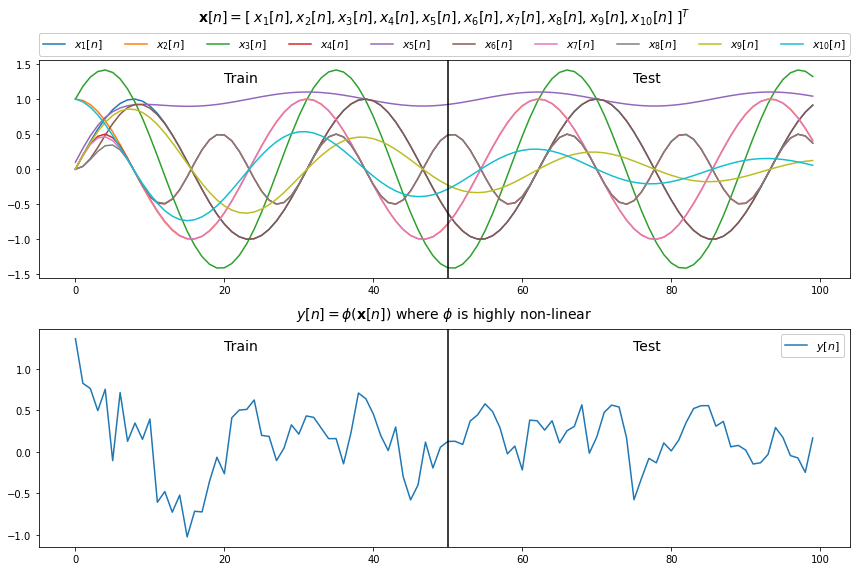

In [5]:
plot_data(X, y)

In [6]:
models = [LMS(), nonlinear_LMS(), deep_network(deep_network_layers)]

loss = train_models(X, y, models, epochs, learning_rate)

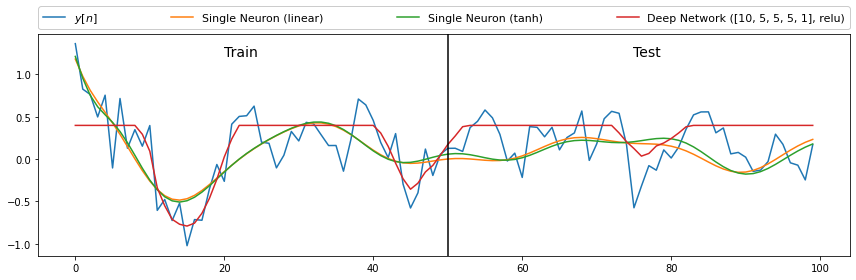

In [7]:
plot_output(X, y, models, deep_network_layers)

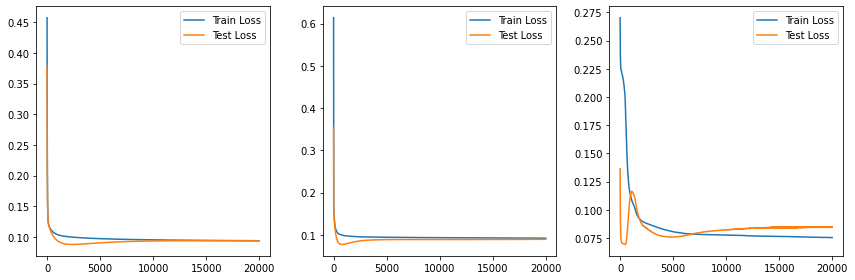

In [8]:
plot_learning_curves(loss)